In [ ]:
import pandas as pd

filename = 'Start Data/2012/RC_2012-12_gilded.csv'

data = pd.read_csv(filename)

check1 = data['gilded'].apply(lambda x: str(x).isdigit())
check2 = data['score'].apply(lambda x: str(x).isdigit())
check3 = data['ups'].apply(lambda x: str(x).isdigit())

data = data[(check1 == True)]

print 'gilded:', data['gilded'].dtype
print data['gilded'].unique()
print 'score:', data['score'].dtype
print data['score'].unique()
print 'ups:', data['ups'].dtype
print data['ups'].unique()

# data.to_csv(filename, encoding='utf-8', index=False)

In [ ]:
%matplotlib inline

filename = 'Start Data/2012/RC_2012-12_gilded.csv'

data = pd.read_csv(filename)

data.plot(x='created_utc', y='gilded', kind='line')

In [1]:
from scripts import Muger as rh
import pandas as pd
import re

# Testing function for scripts
def containsMD(body):
    heading = r'\W#{1,6}\s'
    emphasis1 = r'\*{1,2}[\s\S]+\*{1,2}'
    emphasis2 = r'_{1,2}[\s\S]+_{1,2}'
    emphasis3 = r'~~[\s\S]+~~'
    superscript = r'\w\^\w'
    unordered = r'\W[\*\-\+]\s\S'
    ordered = r'\W\d\.\s\S'
    url = r'\[[\s\S]+\]\(http[s]?://[\w/\.&=\?;\+\-]+\)'
    code = r'`[\s\S]+`'
    quote = r'(&gt;){1,2}[\s\S]+'

    return (re.search(heading, body) is not None 
       or re.search(emphasis1, body) is not None 
       or re.search(emphasis2, body) is not None
       or re.search(emphasis3, body) is not None
       or re.search(superscript, body) is not None
       or re.search(unordered, body) is not None
       or re.search(ordered, body) is not None
       or re.search(url, body) is not None
       or re.search(code, body) is not None
       or re.search(quote, body) is not None)

# Testing function for scripts
def containsTLDR(body):
    tldr = r'[tT][lL];{0,1}[dD][rR]:{0,1}\s'
    
    return (re.search(tldr, body) is not None)


filename = 'Start Data/2012/RC_2012-01_gilded.csv'

data = pd.read_csv(filename)
test = data[['body']]
test['Contains MD'] = test['body'].apply(lambda x: rh.containsMD(x))
test['Contains tldr'] = test['body'].apply(lambda x: rh.containsTLDR(x))
test
# for text in test[test['Contains tldr'] == True]['body'].values:
#     print '\n----------------------\n', text, '\n----------------------\n'

C:\Users\jsmoo\Anaconda2\envs\cs489\lib\site-packages\ipykernel\__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jsmoo\Anaconda2\envs\cs489\lib\site-packages\ipykernel\__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,body,Contains MD,Contains tldr
0,"I want to continue a bit where he left of, sin...",True,False
1,I lifted for a long time before I started usin...,False,False
2,I used to think this. I am a very big proponen...,True,False
3,I prefer it down so I can lean forward onto it...,False,False
4,Kudos from a former Alaskan and UAF/UAA alumni...,False,False
5,I'd be nine so...... parents divorce wasn't yo...,False,False
6,"This isn't my MOST shameful, but it is somethi...",False,False
7,Commenting on a post that will be deleted.,False,False
8,...and I can't even get my WIFE to do that! H...,False,False
9,&gt;Kind of like how the founders of reddit ha...,True,False


In [72]:
from scripts import Munger as mg
import pandas as pd

filename = 'Start Data/2015/RC_2015-01_gilded.csv'

data = pd.read_csv(filename)
temp = pd.read_csv('Start Data/2015/RC_2015-02_gilded.csv')
data = data.append(temp, ignore_index=True)
temp = pd.read_csv('Start Data/2015/RC_2015-03_gilded.csv')
data = data.append(temp, ignore_index=True)
temp = pd.read_csv('Start Data/2015/RC_2015-04_gilded.csv')
data = data.append(temp, ignore_index=True)
temp = pd.read_csv('Start Data/2015/RC_2015-05_gilded.csv')
data = data.append(temp, ignore_index=True)

data['body'] = data['body'].astype(str)

data['Contains MD'] = data['body'].apply(lambda x: mg.containsMD(x))
data['Contains tldr'] = data['body'].apply(lambda x: mg.containsTLDR(x))
data['Word Count'] = data['body'].apply(lambda x: len(x.split(' ')))

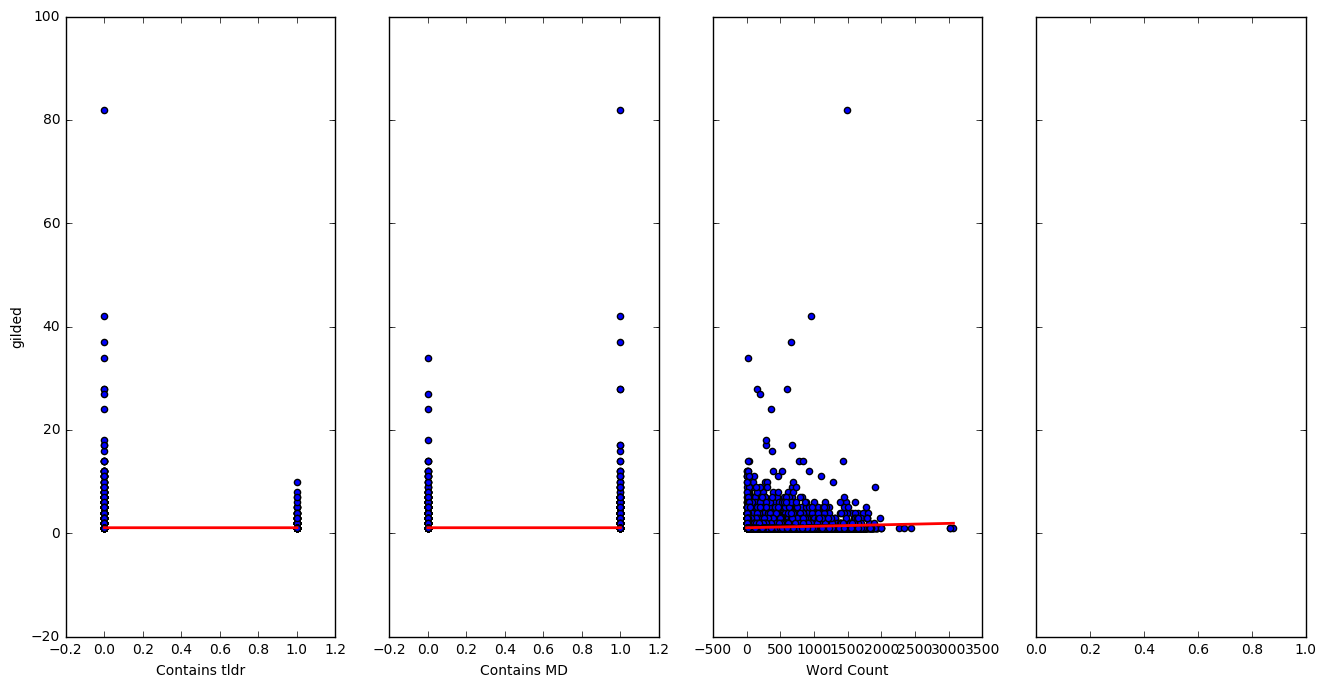

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

# query = 'subreddit == "funny"'
# data = data.query(query)

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True,  figsize=(16, 8))
data.plot(kind='scatter', x='Contains tldr', y='gilded', ax=axs[0])
X_new = pd.DataFrame({'Contains tldr': [data['Contains tldr'].min(), data['Contains tldr'].max()]})
preds = lm_in_sklearn.predict(X_new)
axs[0].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='Contains MD', y='gilded', ax=axs[1])
X_new = pd.DataFrame({'Contains MD': [data['Contains MD'].min(), data['Contains MD'].max()]})
preds = lm_in_sklearn.predict(X_new)
axs[1].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='Word Count', y='gilded', ax=axs[2])
X_new = pd.DataFrame({'Word Count': [data['Word Count'].min(), data['Word Count'].max()]})
preds = lm_in_sklearn.predict(X_new)
axs[2].plot(X_new, preds, c='red', linewidth=2)

# data.plot(kind='scatter', x='Emoji Count', y='gilded', ax=axs[3])
# X_new = pd.DataFrame({'Emoji Count': [data['Emoji Count'].min(), data['Emoji Count'].max()]})
# preds = lm_in_sklearn.predict(X_new)
# axs[2].plot(X_new, preds, c='red', linewidth=2)

In [70]:
X = data[['Word Count']]
y = data['gilded']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm_in_sklearn = LinearRegression()
lm_in_sklearn.fit(X, y)

# print intercept and coefficients
print "Intercept = ", lm_in_sklearn.intercept_
print "Coefficient = ", lm_in_sklearn.coef_

# calculate the R-squared
print 'R-squared = ', lm_in_sklearn.score(X, y)

Intercept =  1.05372951613
Coefficient =  [ 0.0002801]
R-squared =  0.0069173085782


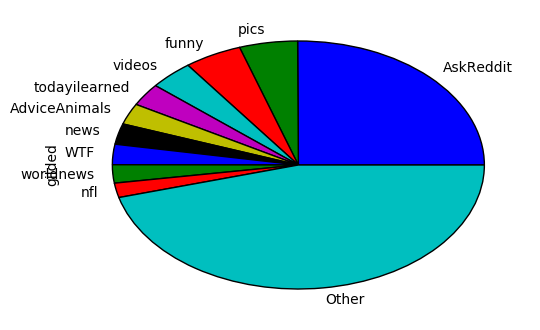

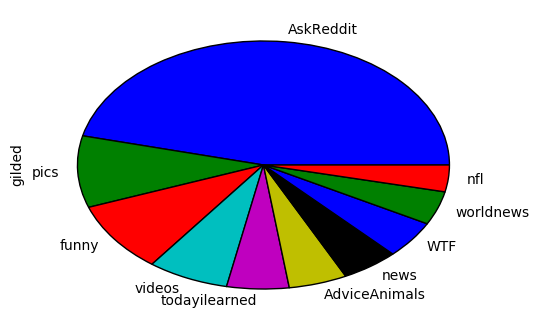

In [117]:
topsum = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=False).head(10).sum()
remaindersum = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=True).head(-10).sum()

top = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=False).head(10)
top.append(pd.DataFrame([(remaindersum-topsum)], columns=['gilded'], index=['Other'])).plot(kind='pie', y='gilded', legend=False)
top.plot(kind='pie', y='gilded', legend=False)